# For the 2nd paper
## deuterium acceleration energy is 80 kV
- Neutron energy and yield distribution, data is from Benoit who took it from Csikai

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# import yield file
fname_yield = '/Users/hkromer/02_PhD/04_Publiations/01_PaperDrafts/2019/01.CharacterizationPaper/Figures/energy_and_yield_vs_angle/data_from_Benoit/80KeV_yield.csv'

# import energy file
# emission angle in degree, neutron energy in MeV
fname_energy = '/Users/hkromer/02_PhD/04_Publiations/01_PaperDrafts/2019/01.CharacterizationPaper/Figures/energy_and_yield_vs_angle/data_from_Benoit/80kV_energy.xlsx'

data_yield = pd.read_csv(fname_yield, header=0, delimiter=';')
data_yield.columns = ['emission_angle', 'counts']
print(data_yield.head())
print(data_yield.info())

data_energy = pd.read_excel(fname_energy, header=None)
data_energy.columns = ['emission_angle', 'neutron_energy']
print(data_energy.head())
print(data_energy.info())

   emission_angle  counts
0               0  2021.7
1               5  2003.1
2              10  1985.2
3              15  1939.3
4              20  1890.1
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37 entries, 0 to 36
Data columns (total 2 columns):
emission_angle    37 non-null int64
counts            37 non-null float64
dtypes: float64(1), int64(1)
memory usage: 720.0 bytes
None
   emission_angle  neutron_energy
0               0        2.804617
1               5        2.803259
2              10        2.799200
3              15        2.792482
4              20        2.783173
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37 entries, 0 to 36
Data columns (total 2 columns):
emission_angle    37 non-null int64
neutron_energy    37 non-null float64
dtypes: float64(1), int64(1)
memory usage: 720.0 bytes
None


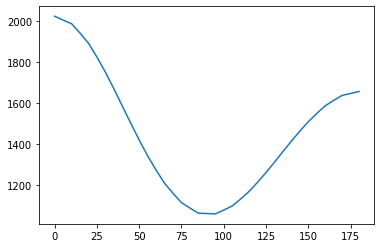

In [14]:
plt.plot(data_yield['emission_angle'].values, data_yield['counts'].values)
plt.show()

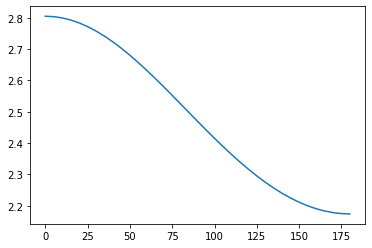

In [15]:
plt.plot(data_energy['emission_angle'].values, data_energy['neutron_energy'].values)
plt.show()

## Normalize yield wrt 90 degree

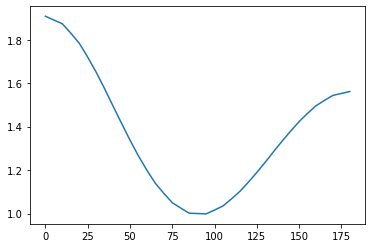

In [20]:
counts_90 = data_yield[ data_yield['emission_angle'] == 90  ]['counts'].values[0]
data_yield['R_norm'] = data_yield['counts'] / counts_90

plt.plot(data_yield['emission_angle'].values, data_yield['R_norm'].values)
plt.show()

# Interpolate values for a nicer plot

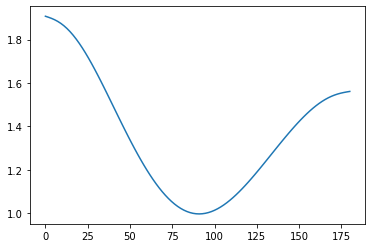

In [51]:



poly = np.polyfit(data_yield['emission_angle'].values,data_yield['R_norm'].values,10)

X = np.linspace(0, 180, 100)
poly_y = np.poly1d(poly)(X)
# print(X)

# X = np.arange(0,180,1)
plt.plot(X, poly_y)
# plt.plot(data_yield['emission_angle'].values, data_yield['R_norm'].values)
plt.show()

# Plot all in one figure

   emission_angle  counts    R_norm
0               0  2021.7  1.908164
1               5  2003.1  1.890609
2              10  1985.2  1.873714
3              15  1939.3  1.830392
4              20  1890.1  1.783955
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37 entries, 0 to 36
Data columns (total 3 columns):
emission_angle    37 non-null int64
counts            37 non-null float64
R_norm            37 non-null float64
dtypes: float64(2), int64(1)
memory usage: 1016.0 bytes
None
 
   emission_angle  neutron_energy
0               0        2.804617
1               5        2.803259
2              10        2.799200
3              15        2.792482
4              20        2.783173
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37 entries, 0 to 36
Data columns (total 2 columns):
emission_angle    37 non-null int64
neutron_energy    37 non-null float64
dtypes: float64(1), int64(1)
memory usage: 720.0 bytes
None


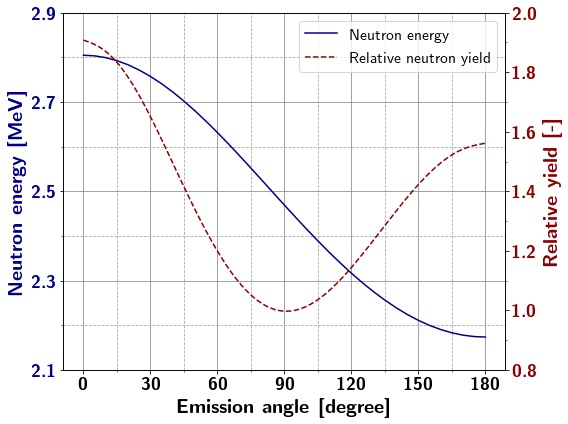

In [87]:
from scipy.interpolate import splrep, splev
from scipy.interpolate import splrep, splev
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import os
from matplotlib.ticker import AutoMinorLocator

os.environ["PATH"] += os.pathsep + '/usr/local/texlive/2018/bin/x86_64-darwin'
plt.rc('text', usetex=True)
plt.rc('font', weight='bold')
matplotlib.rcParams['mathtext.fontset'] = 'custom'
matplotlib.rcParams['mathtext.rm'] = 'Arial'
matplotlib.rcParams['mathtext.it'] = 'Arial:italic'
matplotlib.rcParams['mathtext.bf'] = 'Arial:bold'
matplotlib.rcParams['mathtext.tt'] = 'Arial'
matplotlib.rcParams['mathtext.cal'] = 'Arial'
matplotlib.rcParams['text.latex.preamble'] = [r'\usepackage{sfmath} \boldmath']
%matplotlib inline

# import yield file
fname_yield = '/Users/hkromer/02_PhD/04_Publiations/01_PaperDrafts/2019/01.CharacterizationPaper/Figures/energy_and_yield_vs_angle/data_from_Benoit/80KeV_yield.csv'

# import energy file
# emission angle in degree, neutron energy in MeV
fname_energy = '/Users/hkromer/02_PhD/04_Publiations/01_PaperDrafts/2019/01.CharacterizationPaper/Figures/energy_and_yield_vs_angle/data_from_Benoit/80kV_energy.xlsx'

data_yield = pd.read_csv(fname_yield, header=0, delimiter=';')
data_yield.columns = ['emission_angle', 'counts']
counts_90 = data_yield[ data_yield['emission_angle'] == 90  ]['counts'].values[0]
data_yield['R_norm'] = data_yield['counts'] / counts_90
print(data_yield.head())
print(data_yield.info())

print(' ')
data_energy = pd.read_excel(fname_energy, header=None)
data_energy.columns = ['emission_angle', 'neutron_energy']
print(data_energy.head())
print(data_energy.info())


# PLOT
fig, ax1 = plt.subplots(figsize=(8, 6))

fs = 20
markersize = 8

# Energy on left y axis
p1=ax1.plot(data_energy['emission_angle'].values, data_energy['neutron_energy'].values, color='darkblue', markersize=markersize, label=r'Neutron energy')
ax1.set_xlabel(r"\textbf{Emission angle [degree]}", fontsize=fs)
ax1.set_ylabel(r"\textbf{Neutron energy [MeV]}", fontsize=fs, color='darkblue')
ax1.tick_params('x', colors='black', labelsize=fs-2)
ax1.tick_params(axis='y', labelcolor='darkblue', labelsize=fs-2)
ax1.set_ylim(2.1,2.9)
ax1.set_yticks(np.arange(2.1,3.1,0.2))
# ax1.set_xlim()
ax1.set_xticks(np.arange(0,180+30,30))
# minor ticks x
minor_locator = AutoMinorLocator(2)
ax1.xaxis.set_minor_locator(minor_locator)
# minor ticks y
minor_locator = AutoMinorLocator(2)
ax1.yaxis.set_minor_locator(minor_locator)



ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis


# Yield on right y axis
poly = np.polyfit(data_yield['emission_angle'].values,data_yield['R_norm'].values,10)
X = np.linspace(0, 180, 100)
poly_y = np.poly1d(poly)(X)
p2=ax2.plot(X, poly_y, '--', color='darkred', markersize=markersize, label=r'Relative neutron yield')
ax2.set_ylabel(r"\textbf{Relative yield [-]}", fontsize=fs, color='darkred')
ax2.tick_params(axis='y', labelcolor='darkred', labelsize=fs-2)
ax2.set_ylim(0.9,1.9)
ax2.set_yticks(np.arange(0.8,2.2,0.2))
# minor ticks x
minor_locator = AutoMinorLocator(2)
ax2.xaxis.set_minor_locator(minor_locator)
# minor ticks y
minor_locator = AutoMinorLocator(2)
ax2.yaxis.set_minor_locator(minor_locator)


ps = p1+p2
labs = [p.get_label() for p in ps]
ax2.legend(ps, labs, loc='best', fontsize=fs-4)
ax1.grid(which="minor",ls="--", color='0.65')
ax1.grid(which="major",ls="-", color='0.55')
# ax1.grid(None)
plt.tight_layout()

# plt.savefig(f'./{figname}.pdf')
# plt.savefig(f'./{figname}_600.png',dpi=600)
# plt.savefig(f'./{figname}_1200.png',dpi=1200)
plt.show()